###### Exam 1 Problem 6: Ethylene to aromatics

In [40]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [99]:
# Define differential equations for reactor

def diff(t,U):
    
    # Assign U to dependent variables
    F_E = U[0]
    F_O = U[1]
    F_B = U[2]
    F_H = U[3]
    F_W = U[4]
    F_I = U[5]
    
    # Misc calculations
    F = F_E + F_O + F_B + F_H + F_W + F_I
    T = 823 # K
    P = 4 # atm 
    v = (R * F * T)/P #ideal gas
    C_E = F_E/v
    C_O = F_O/v
    C_B = F_B/v
    C_H = F_H/v
    C_W = F_W/v
    C_I = F_I/v
    QC = (C_O * C_B**3 * C_H**3)/(C_E**10)
    
    # Rate calculations
    r = kf * C_E * (1 - QC/KC)
    
    # Differential equations
    dF_E = -10*r
    dF_O = r
    dF_B = 3*r
    dF_H = 3*r
    dF_W = 0
    dF_I = 0
    
    # Assign differential equations to differential array dU
    dU=np.zeros(len(U))
    dU[0] = dF_E
    dU[1] = dF_O
    dU[2] = dF_B
    dU[3] = dF_H
    dU[4] = dF_W
    dU[5] = dF_I
    
    # Reorganize output into
    dU = np.array(dU).tolist()
    
    return dU

In [100]:
# Specify initial conditions
v0 = 40       # L/hr
y_E0 = 0.30     # mol/mol
y_H0 = 0.05      # mol/mol
y_W0 = 0.30      # mol/mol
y_I0 = 0.35     # mol/mol
P0 = 4    # atm
T0 = 823     # K
R = 0.082057 # L atm/mol K
F0 = P0*v0/R/T0        # mol/hr
F_E0 = F0*y_E0      # mol/hr
F_H0 = F0*y_H0     # mol/hr
F_W0 = F0*y_W0      # mol/hr
F_I0 = F0*y_I0     # mol/hr

# Specify reaction constants
Tref = T0
Pref = 1 # atm
delta = -3 
kf =  0.04       # hr^-1
dH = -508.5 #kj/mol
dS = -502.6e-3 #kJ/mol*K
dG = dH - Tref*dS # kJ/mol
Keq = np.exp(-dG/((8.314e-3)*Tref))
Kp = Keq*(Pref)**(-delta)
KC = Kp*(R*Tref)**(-delta)# (L/mol)^3
print("KC:",KC)

# Specify initial conditions
U0 = [F_E0,0,0,F_H0,F_W0,F_I0]

# Specify integration limits
Vlim = (0,500)
Vlist = np.linspace(Vlim[0],Vlim[1],num=100) # not essential, gives 100 evenly-spaced data points

# Run integration
solution = solve_ivp(diff,Vlim,U0,t_eval=Vlist)

# Interpret output
U = solution.y.T
V = solution.t
F_E = U[:,0]
F_O = U[:,1]
F_B = U[:,2]
F_H = U[:,3]
F_W = U[:,4]
F_I = U[:,5]

X_E = (F_E0-F_E)/F_E0

# Display conversion at reactor outlet
print(X_E[-1])

KC: 323151292997.87915
0.9042052876047516


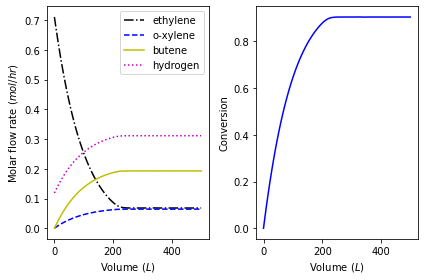

In [101]:
# Plot data
fig = plt.figure()
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(V,F_E,'-.k')
ax1.plot(V,F_O,'--b')
ax1.plot(V,F_B,'-y')
ax1.plot(V,F_H,':m')
ax1.legend(['ethylene','o-xylene','butene','hydrogen'])
ax1.set_xlabel('Volume ($L$)')
ax1.set_ylabel('Molar flow rate ($mol/hr$)')

ax2.plot(V,X_E,'b')
ax2.set_xlabel('Volume ($L$)')
ax2.set_ylabel('Conversion')

fig.tight_layout()
plt.show()

# As the volume increases, the molar flow rates of hydrogen, o-xylene, and butene increases 
# until it plateaus. The conversion rate also reaches the optimal rate and plateaus after 
# the volume has reached a certain value.